**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# **DATA PREPROCESSING**

In [6]:
print("Shape of the data:", df.shape)
print("number of rows:", len(df))
print("number of columns:", len(df.columns))

Shape of the data: (1470, 35)
number of rows: 1470
number of columns: 35


In [7]:
df.dtypes.value_counts()

,count
int64,26
object,9


#### There are 26 numerical columns and 9 categorical columns

In [8]:
df.duplicated().value_counts()

,count
False,1470


In [9]:
missing_values = df.isnull().sum().to_frame().rename(columns={0: 'Total no. of missing values'})
missing_values['% of missing values'] = missing_values['Total no. of missing values'] / len(df) * 100
missing_values

,Total no. of missing values,% of missing values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


### There are no null values nor duplicated values

In [10]:
df.select_dtypes(np.number).sample(6)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1444,56,310,7,2,1,2032,4,72,3,1,...,4,80,1,14,4,1,10,9,9,8
770,46,430,1,4,1,1069,4,40,3,5,...,4,80,2,23,0,3,2,2,2,2
520,48,817,2,1,1,712,2,56,4,2,...,4,80,0,12,3,3,2,2,2,2
408,52,1490,4,2,1,546,4,30,3,4,...,4,80,0,31,2,1,5,2,1,4
1278,36,1383,10,3,1,1790,4,90,3,3,...,4,80,1,15,1,3,12,8,5,7
560,34,167,8,5,1,775,2,32,3,2,...,3,80,1,7,3,3,0,0,0,0


In [11]:
print('columns of the datatset in order')
for column in df.columns:
  print(column)

columns of the datatset in order
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


Labelling categories in numerical features

In [12]:
df['Education'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1: 'Low', 2:'Medium', 3:'High', 4:'Very High'})

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [14]:
df.select_dtypes('object').sample(6)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
303,No,Travel_Rarely,Sales,Bachelor,Technical Degree,Medium,Male,Very High,Sales Executive,Very High,Married,Y,No,Excellent,Medium,Good
1412,No,Travel_Rarely,Research & Development,College,Medical,Very High,Male,High,Laboratory Technician,Medium,Married,Y,No,Excellent,High,Good
1243,No,Travel_Rarely,Human Resources,Bachelor,Life Sciences,High,Female,Low,Human Resources,High,Married,Y,No,Outstanding,High,Best
195,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Research Scientist,Low,Married,Y,Yes,Excellent,Low,Good
717,No,Travel_Rarely,Research & Development,Master,Technical Degree,High,Female,High,Laboratory Technician,Medium,Married,Y,No,Excellent,Medium,Better
333,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Female,High,Healthcare Representative,Low,Married,Y,No,Excellent,Low,Good


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


1. The column 'EmployeeNumber' is obviously having unique values, so there is no use of this column in analysis.
2. 'EmployeeCount' and 'StandardHours' are having same standard deviation in their respective columns, so these columns will not give any information and correlation.
3. The minimum age is 18, which conveys all employees are adult. There is no use of over18 column.

### Drop unnecessary columns

In [16]:
df1 = df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis=1)

In [17]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [18]:
print('Shape of the dataframe:', df1.shape)
print('Number of rows:', len(df1))
print('Number of columns:', len(df1.columns))

Shape of the dataframe: (1470, 31)
Number of rows: 1470
Number of columns: 31


In [19]:
print('Columns of the dataframe in order:')
for columns in df1.columns:
  print(columns)

Columns of the dataframe in order:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [20]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [21]:
df1.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobRole,1470,9,Sales Executive,326
JobSatisfaction,1470,4,Very High,459


1. Attrition and OverTime are highly towards No category.
2. BusinessTravel is based on Travel_Rarely.
3. Employees are mostly working in Research & Development department.

In [22]:
for columns in df1.columns:
  print(f'{columns}- Number of unique values: {df1[columns].nunique()}')
  print('===========================================================')

Age- Number of unique values: 43
Attrition- Number of unique values: 2
BusinessTravel- Number of unique values: 3
DailyRate- Number of unique values: 886
Department- Number of unique values: 3
DistanceFromHome- Number of unique values: 29
Education- Number of unique values: 5
EducationField- Number of unique values: 6
EnvironmentSatisfaction- Number of unique values: 4
Gender- Number of unique values: 2
HourlyRate- Number of unique values: 71
JobInvolvement- Number of unique values: 4
JobLevel- Number of unique values: 5
JobRole- Number of unique values: 9
JobSatisfaction- Number of unique values: 4
MaritalStatus- Number of unique values: 3
MonthlyIncome- Number of unique values: 1349
MonthlyRate- Number of unique values: 1427
NumCompaniesWorked- Number of unique values: 10
OverTime- Number of unique values: 2
PercentSalaryHike- Number of unique values: 15
PerformanceRating- Number of unique values: 2
RelationshipSatisfaction- Number of unique values: 4
StockOptionLevel- Number of uniq

In [23]:
df1.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Yes,Excellent,Low,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,No,Outstanding,Very High,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Yes,Excellent,Medium,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Yes,Excellent,High,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,No,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Laboratory Technician,Very High,Married,No,Excellent,High,Better
1466,No,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Healthcare Representative,Low,Married,No,Excellent,Low,Better
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Manufacturing Director,Medium,Married,Yes,Outstanding,Medium,Better
1468,No,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,Sales Executive,Medium,Married,No,Excellent,Very High,Good


In [24]:
categorical_features = []
for column in df1.columns:
    if df1[column].dtype == object and len(df1[column].unique()) <= 30:
        categorical_features.append(column)
        print(f"{column} : {df1[column].unique()}")
        print(df[column].value_counts())
        print("====================================================================================")
categorical_features.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EnvironmentSatisfaction : ['Medium' '

#**DATA VISUALIZATION**

#### VISUALIZING THE EMPLOYEE ATTRITION RATE

<ipython-input-25-10e6250aae75>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=['#1d7874','#8b0000'])


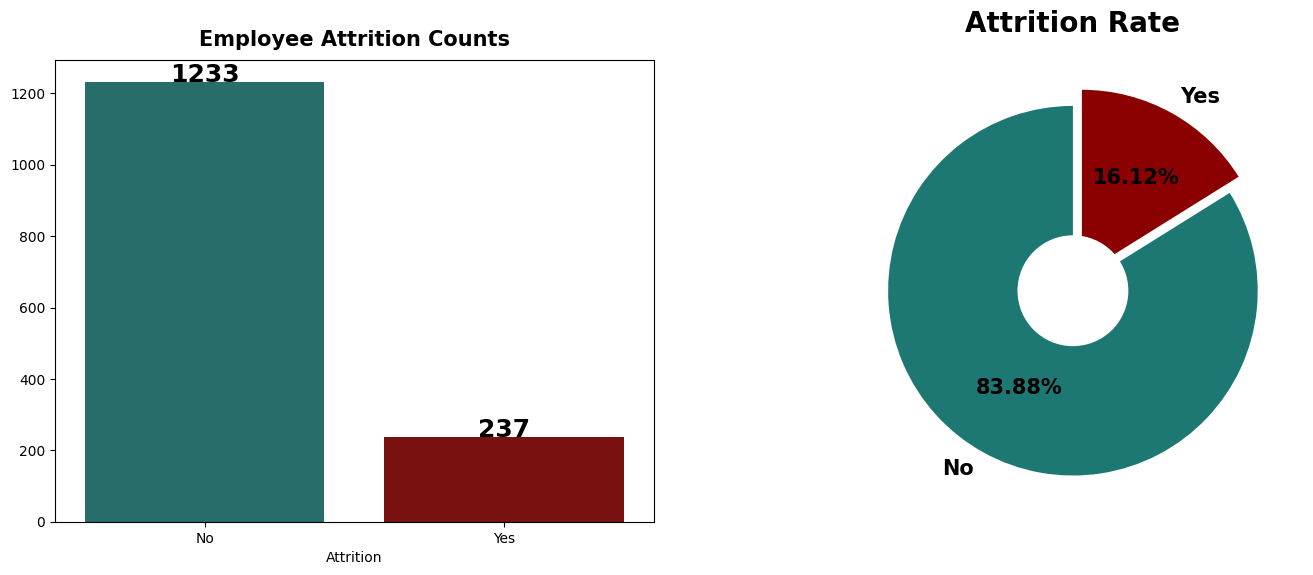

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df1['Attrition'].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=['#1d7874','#8b0000'])
plt.title('Employee Attrition Counts', fontweight='black', size=15, pad=10)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, str(attrition_rate.values[i]), ha='center', fontweight='black', fontsize=18)

plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=['No','Yes'], autopct='%.2f%%', textprops={'fontweight':'black','size':15}, colors=['#1d7874','#8b0000'], explode=[0,0.1], startangle=90)
center_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Attrition Rate', fontweight= 'black', size=20, pad=20)
plt.show()

1. The employee attrition rate is 16.12
2. According to the experts in the human resources, the attrition rate is 2% to 4% is normal in organization
3. Therefore, the attrition rate of the organization is at high risk, and organization should take necessary measures to reduce it.

#### VISUALIZING THE ATTRITION RATE BY GENDER

<ipython-input-26-c67005a0d7fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y= value_2.values, palette=['#1d7478','#8b0000'])


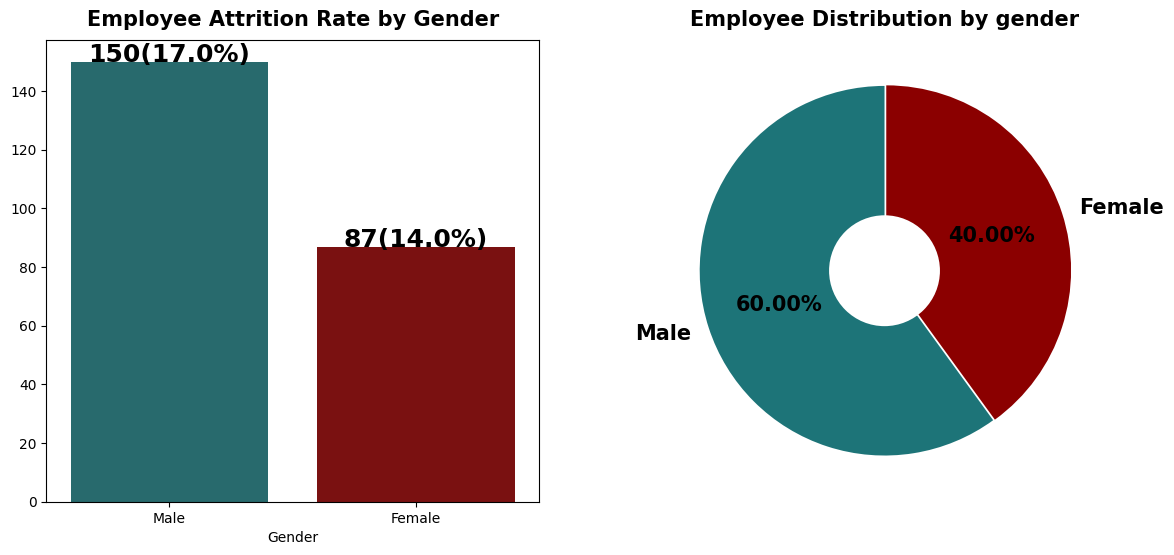

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
new_df = df[df['Attrition']== 'Yes']
value_1 = df['Gender'].value_counts()
value_2 = new_df['Gender'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_1.index, y= value_2.values, palette=['#1d7478','#8b0000'])
plt.title('Employee Attrition Rate by Gender', fontweight='black', size=15, pad=10)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+'('+str(attrition_rate[index])+'%)', ha='center', fontweight='black', fontsize=18)

plt.subplot(1,2,2)
gender_rate = df['Gender'].value_counts()
plt.pie(gender_rate, labels=['Male','Female'], autopct='%.2f%%', textprops={'fontweight':'black','size':15}, explode=[0,0.01], colors=['#1d7478','#8b0000'], startangle=90)
center_circle = plt.Circle((0,0), (0.3), fc='white')
fig = plt.gcf()
fig = plt.gca().add_artist(center_circle)
plt.title('Employee Distribution by gender', fontweight='black', size=15, pad=10)
plt.show()

Number of Males in organization ate higher proportion than Female, which are higher than 20%

#### VISUALIZING EMPLOYEE ATTRITION RATE BY AGE

<ipython-input-27-36629616e682>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette=['#1d7874','#8b0000'])


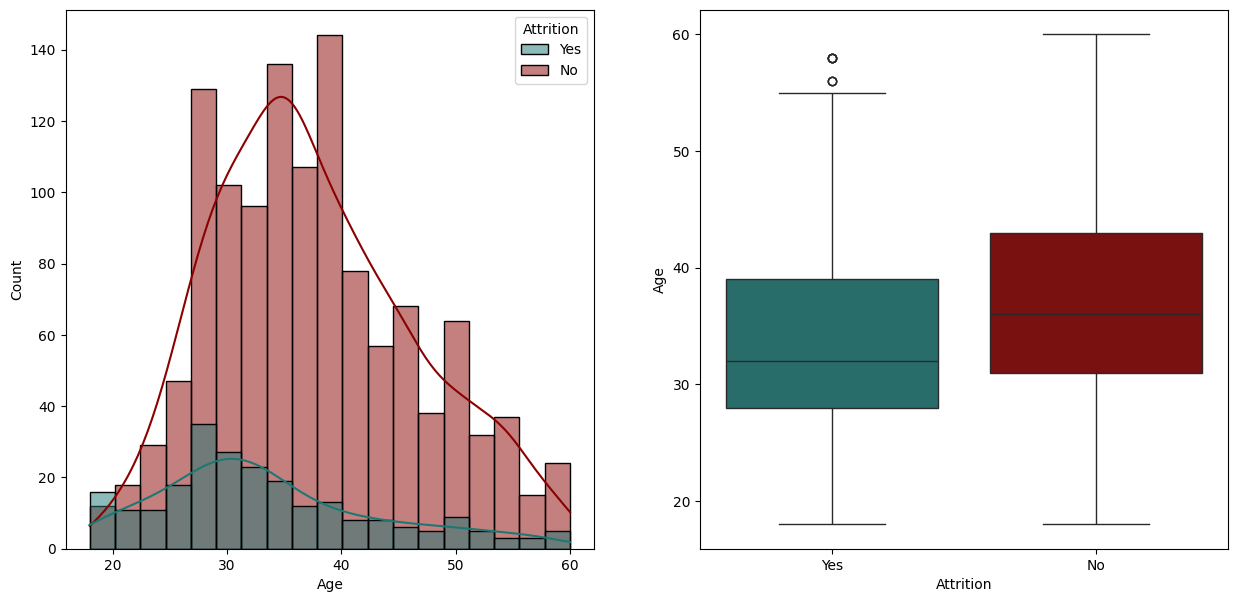

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
age = df[df['Age']<=60]
age_rate = age['Attrition'].value_counts()
sns.histplot(data=df, x='Age', hue='Attrition', palette=['#1d7874','#8b0000'], kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Attrition', y='Age', palette=['#1d7874','#8b0000'])
plt.show()

1. In the histogram we can see that attrition rate is high on 25-40 age people, and gradually decreasing.
2. So, as per histogram the young employees are high attrition than older employees.
3. In the boxplot, we can see that the median of age who working in organization are more than who left the organization.

#### VISUALIZATION EMPLOYEE ATTRITION BY BUSINESS TRAVEL

<ipython-input-28-240a0190a726>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])


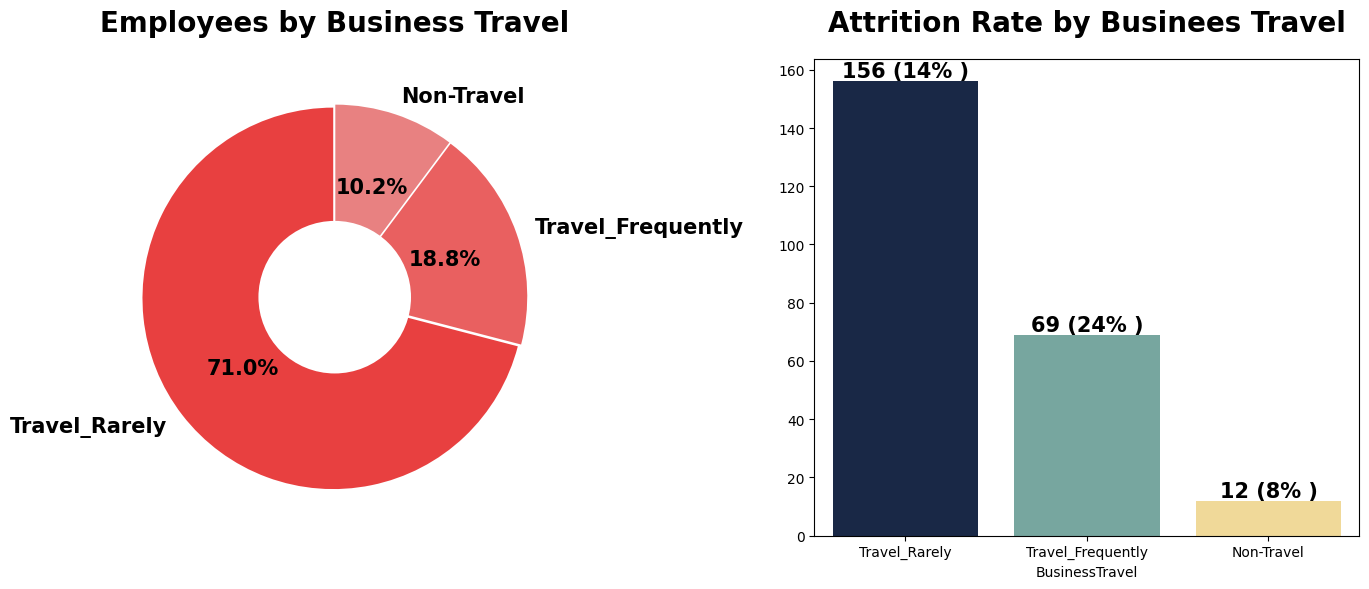

In [28]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",explode=[0.01,0.01,0.01],startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",size=15,fontweight="black")
plt.tight_layout()
plt.show()

1.Most of the employees in the organization Travel Rarely.

2.Highest employee attrition can be observed by those employees who Travels Frequently.

3.Lowest employee attrition can be observed by those employees who are Non-Travel.

#### VISUALIZATION EMPLOYEE ATTRITION BY DEPARTMENT

<ipython-input-29-385369d0f6b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y=value_1.values, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-29-385369d0f6b6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette=["#11264e","#6faea4","#FEE08B"])


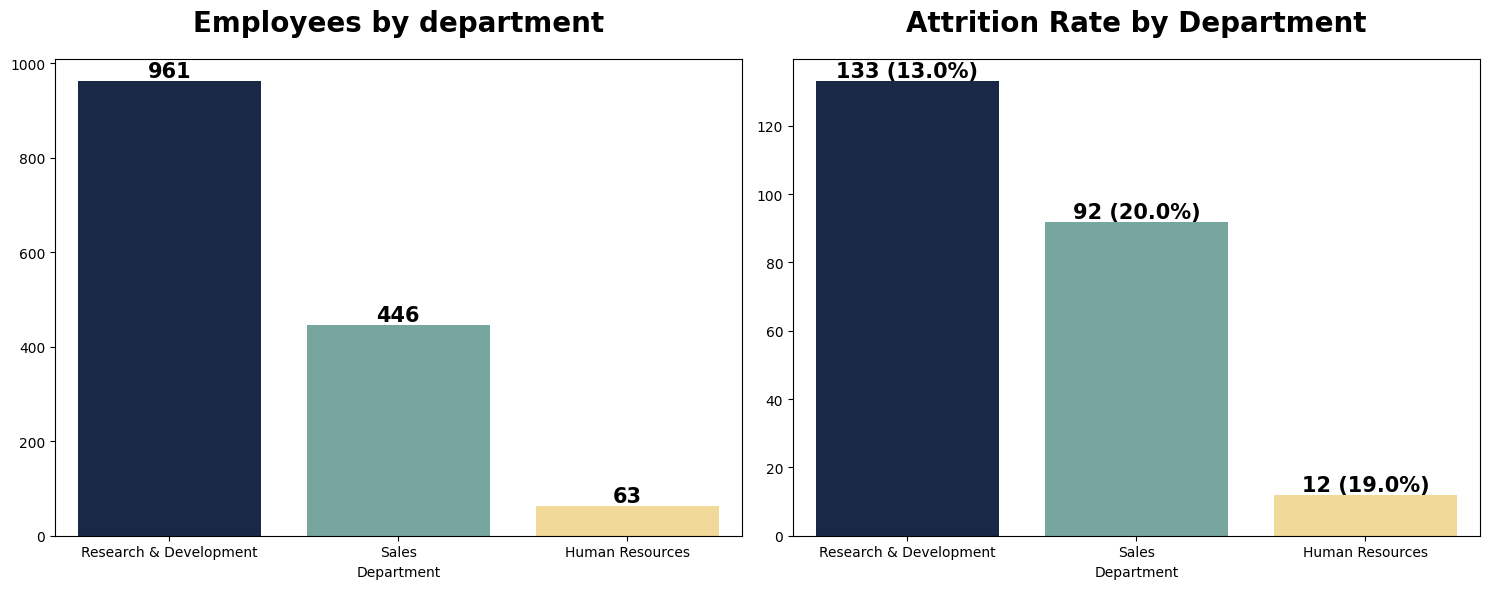

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df['Department'].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employees by department", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha='center', va='bottom', fontweight='black', size=15)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['Department'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_2):
   plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', fontweight='black', size=15)
plt.tight_layout()
plt.show()

1.Most of the employees are from Research & Development Department.

2.Highest Attrition is in the Sales Department.
Human Resources Department Attrition rate is also very high.

3.Though of highest employees in Research & Development department there is least attrition compared to other departments.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY DAILY RATE

In [30]:
df['DailyRate'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [31]:
#define the bin edges for the groups
bin_edges = [0,500,1000,1500]

bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

df['DailyRateGroup']= pd.cut(df['DailyRate'], bins= bin_edges, labels= bin_labels)

1.Employees with Average DailyRate & High Daily Rate are approxiamately equal.

2.But the attrition rate is very high of employees with average Daily Rate compared to the employees with High DailyRate.

3.The attrition rate is also high of employees with low DailyRate.
Employees which are not getting High Daily Rate are mostly leaving the organization.

<ipython-input-32-5d6eab698934>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e","#6faea4","#FEE08B"])


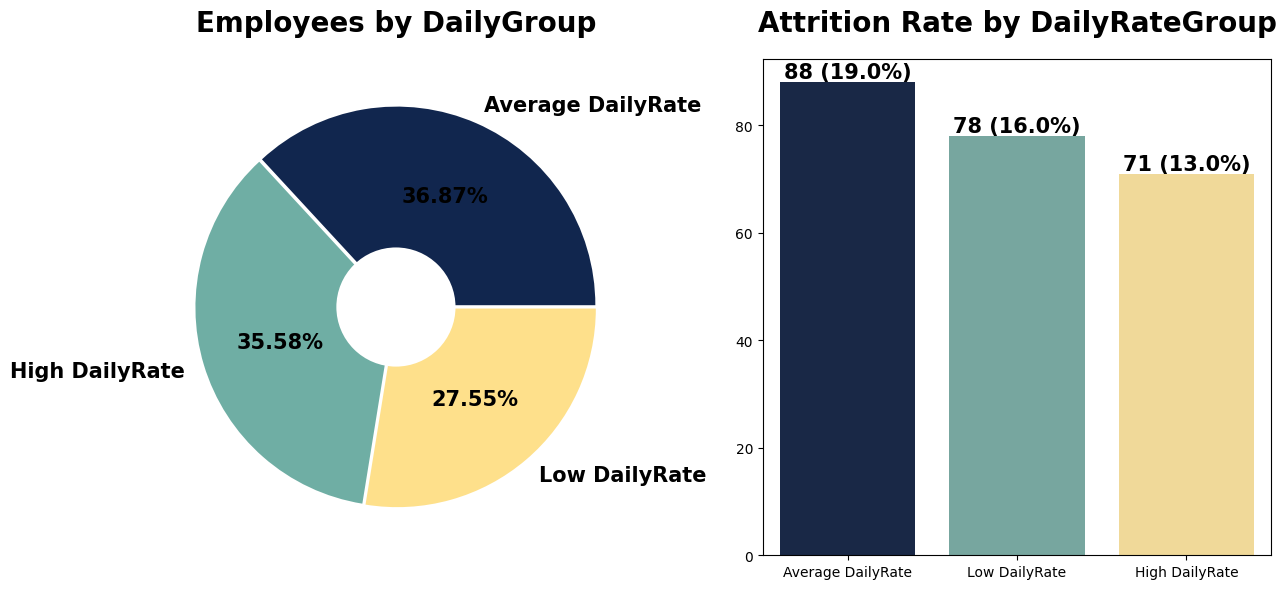

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df['DailyRateGroup'].value_counts()
plt.pie(value_1.values, labels = value_1.index, autopct = '%.2f%%', textprops = {'fontweight':'black','size':'15'}, explode=[0.01,0.01,0.01],colors=['#11264e','#6faea4','#FEE08B'])
center_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employees by DailyGroup", fontweight="black", size=20, pad=20)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['DailyRateGroup'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by DailyRateGroup", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_2.values):
    plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+'%)', ha='center', va='bottom', fontweight='black', size=15)
plt.tight_layout()
plt.show()

#### VISUALIZATION OF EMPLOYEE ATTRITION BY DISTANCE FROM HOME

In [33]:
df['DistanceFromHome'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [34]:
bin_edges = [0,2,5,10,30]

bin_labels = ['Low Distance', 'Medium Distance', 'High Distance', 'Very High Distance']

df['DistanceFromHomeGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

<ipython-input-35-cd3b40fe170d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
<ipython-input-35-cd3b40fe170d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
<ipython-input-35-cd3b40fe170d>:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


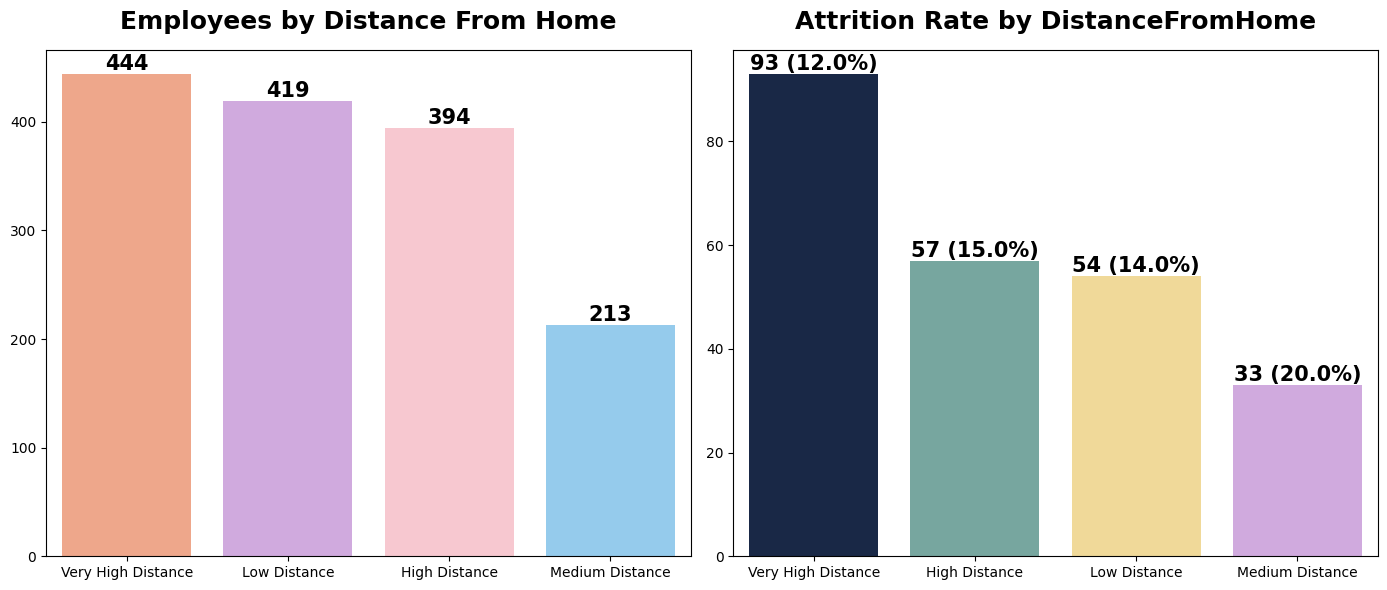

In [35]:
##Visualization to show Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["DistanceFromHomeGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

#Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DistanceFromHomeGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

1.In the organization there are all kind of employees staying close or staying far from the office.

2.The feature Distance From Home doesn't follows any trend in attrition rate.

3.Employees staying close to the organization are mostly leaving compared to employees staing far from the oragnization.

#### VISUALIZATION OF EMPLOYEE ATTRTITION BY EDUCATION

<ipython-input-36-c28e5fa0bbab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_1.index, y = value_1.values, order = value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-36-c28e5fa0bbab>:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index, y = value_1.values, order = value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-36-c28e5fa0bbab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y = value_2.values, order = value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-36-c28e5fa0bbab>:12: UserWarning: 
The pa

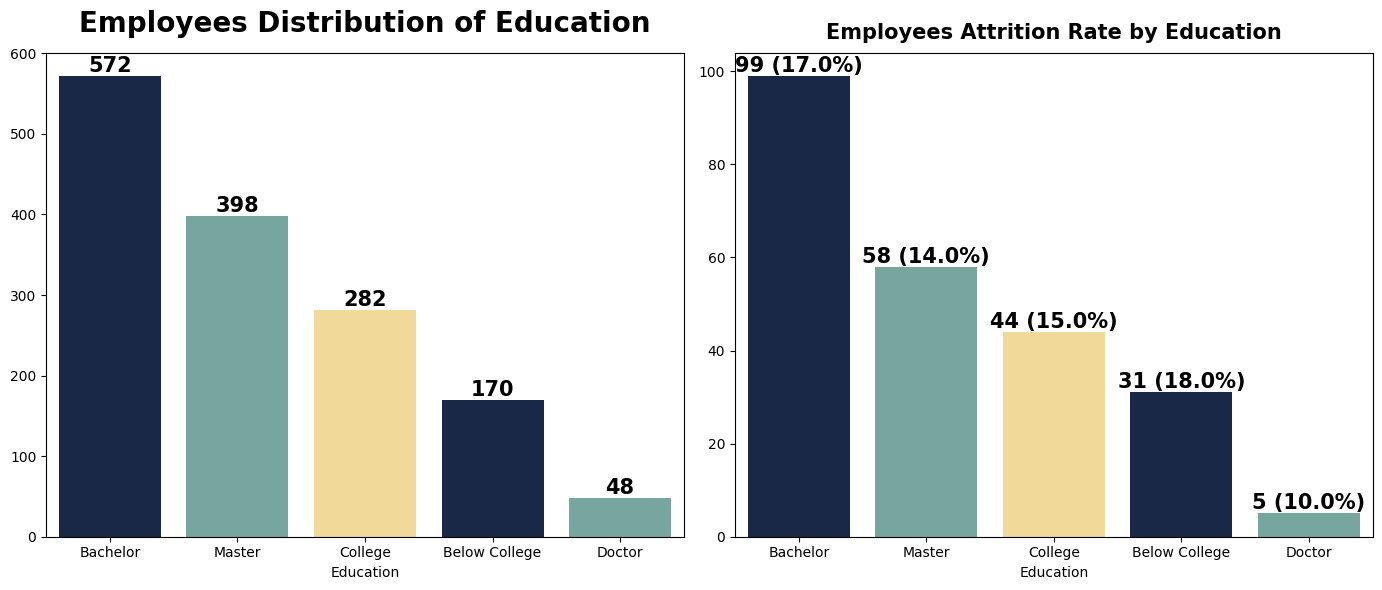

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df['Education'].value_counts()
sns.barplot(x=value_1.index, y = value_1.values, order = value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employees Distribution of Education", fontweight = 'black', size=20, pad=15)
for index, value in enumerate(value_1.values):
   plt.text(index, value, value, ha='center', va='bottom', fontweight='black', size=15)

plt.subplot(1,2,2)
value_2 = new_df['Education'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y = value_2.values, order = value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employees Attrition Rate by Education", fontweight='black', size=15, pad=10)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', fontweight='black', size=15)
plt.tight_layout()
plt.show()

1.Most of the employees in the organization have completed Bachelors or Masters as their education qualification.

2.Very few employees in the organization have completed Doctorate degree as their education qualification.

3.We can observe a trend of decreasisng in attrition rate as the education qualification increases

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroup,DistanceFromHomeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,0,8,0,Bad,6,4,0,5,High DailyRate,Low Distance
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,1,10,3,Better,10,7,1,7,Low DailyRate,High Distance
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,7,3,Better,0,0,0,0,High DailyRate,Low Distance
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,0,8,3,Better,8,7,3,0,High DailyRate,Medium Distance
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,1,6,3,Better,2,2,2,2,Average DailyRate,Low Distance


#### VISUALIZATION OF EMPLOYEE ATTRITION BY EDUCATION FIELD

<ipython-input-38-94d4f525fd77>:4: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index, y=value_1.values, hue=value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-38-94d4f525fd77>:13: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index, y=value_2.values, hue=value_2.index,palette=["#11264e","#6faea4","#FEE08B"])


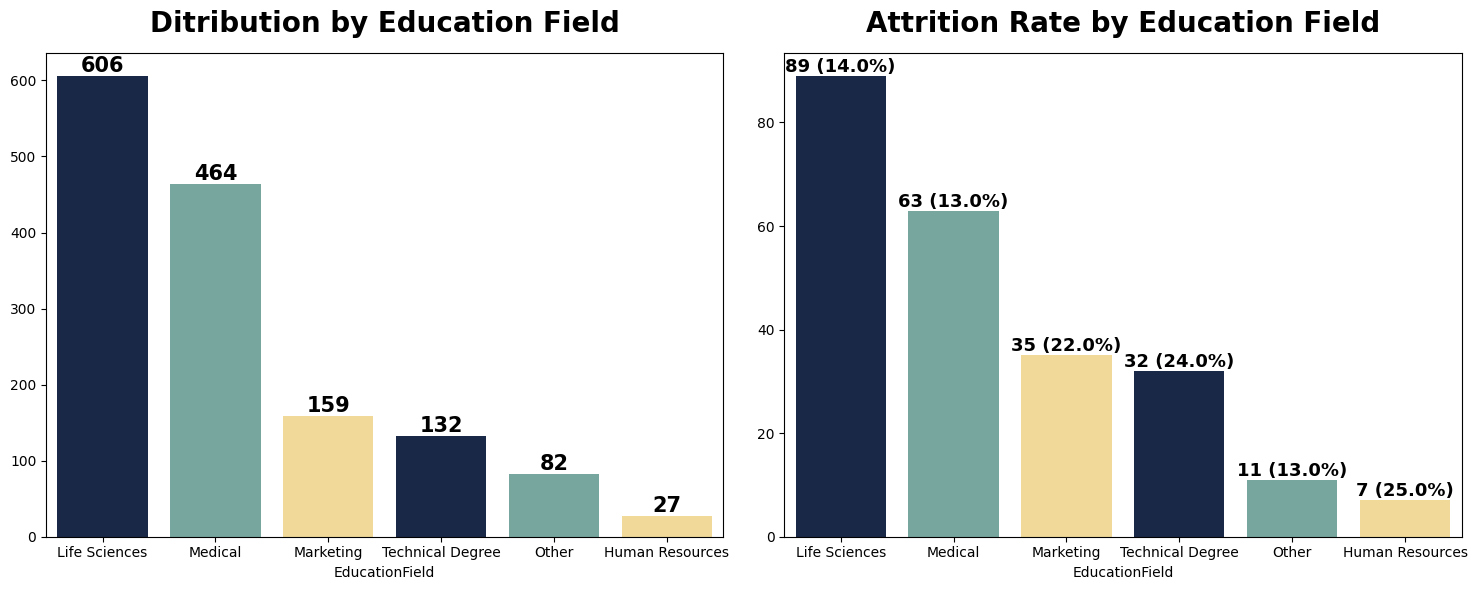

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df['EducationField'].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, hue=value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title('Ditribution by Education Field', fontweight='black', size=20, pad=15)
for index, value in enumerate(value_1.values):
  plt.text(index, value, value, ha='center', va='bottom', fontweight='black', size=15)
#plt.xticks(rotation=90)

plt.subplot(1,2,2)
value_2 = new_df['EducationField'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_1.index, y=value_2.values, hue=value_2.index,palette=["#11264e","#6faea4","#FEE08B"])
plt.title('Attrition Rate by Education Field', fontweight='black', size=20, pad=15)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', fontweight='black', size=13)
plt.tight_layout()
plt.show()

1.Most of the employees are either from Life Science or Medical Education Field.

2.Very few employees are from Human Resources Education Field.

3.Education Fields like Human Resources, Marketing, Technical is having very high attrition rate.

4.This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY ENVIRONMENT SATISFACTION

<ipython-input-39-ee6baea1f707>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-39-ee6baea1f707>:14: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])


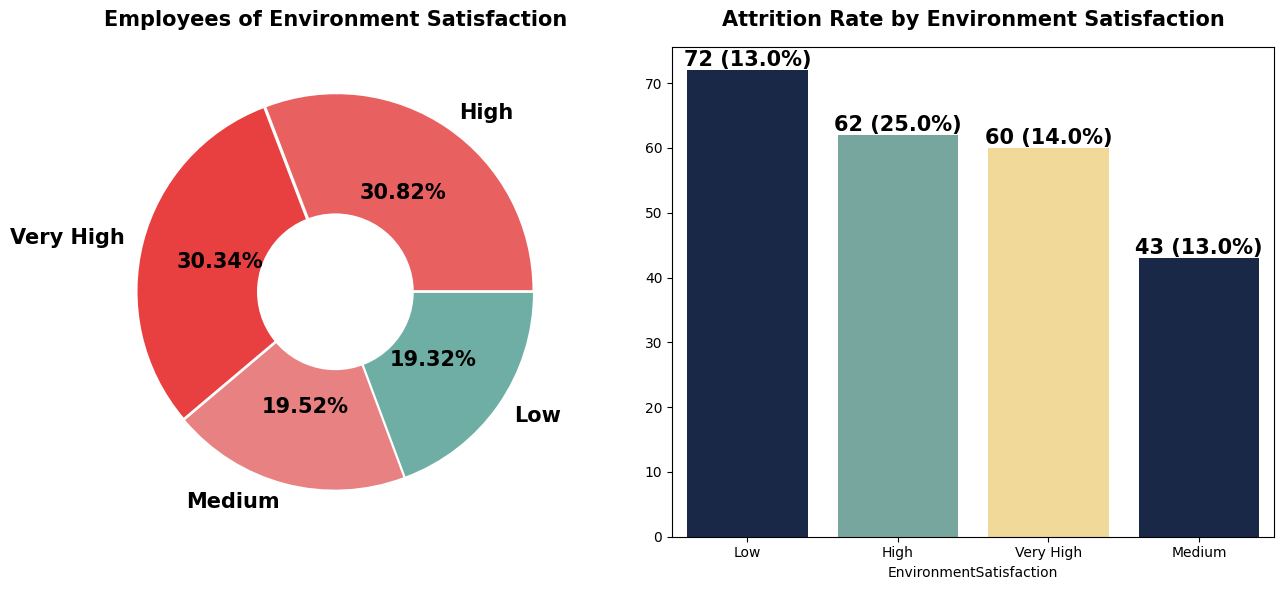

In [39]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df['EnvironmentSatisfaction'].value_counts()
plt.title('Employees of Environment Satisfaction', fontweight='black', size=15, pad=15)
plt.pie(value_1.values, labels=value_1.index, autopct="%.2f%%", textprops={'fontweight':'black','size':'15'}, explode=[0.01,0.01,0.01,0.01], colors = ['#E96060','#E84040','#E88181',"#6faea4"])
center_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['EnvironmentSatisfaction'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title('Attrition Rate by Environment Satisfaction', fontweight='black', size=15, pad=15)
for index, value in enumerate(value_2.values):
   plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', size=15, fontweight='black')
plt.tight_layout()
plt.show()

1.Most of the employees have rated the organization environment satisfaction High & Very High.

2.Though the organization environment satisfaction is high still there's very high attriton in this envirnoment.

3.Attrition Rate increases with the decrease in the level of environmental satisfaction.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY JOB ROLES

<ipython-input-40-bd119297dc0a>:4: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_1.index, y=value_1.values, hue=value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
<ipython-input-40-bd119297dc0a>:14: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])


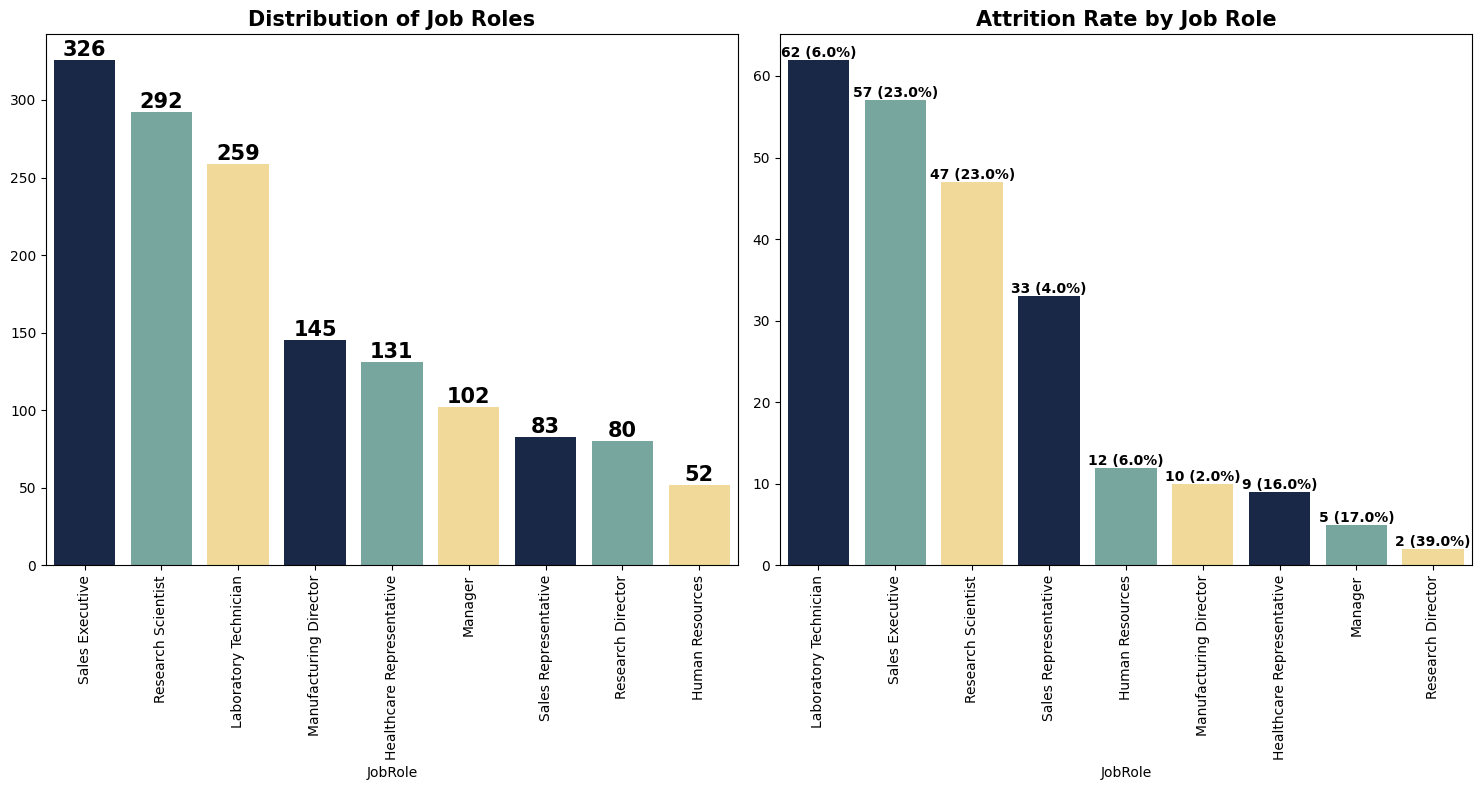

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
value_1 = df['JobRole'].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, hue=value_1.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title('Distribution of Job Roles', fontweight='black', size=15)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
  plt.text(index, value, value, ha='center', va='bottom', fontweight='black', size=15)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['JobRole'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.xticks(rotation=90)
plt.title('Attrition Rate by Job Role', fontweight='black', size=15)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', fontweight='black', size=10)
plt.tight_layout()
plt.show()

1.Most employees is working as Sales executive, Research Scientist or Laboratory Technician in this organization.

2.Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   object  
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   object  
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   object

#### VISUALIZATION OF EMPLOYEE ATTRITION BY JOB LEVEL

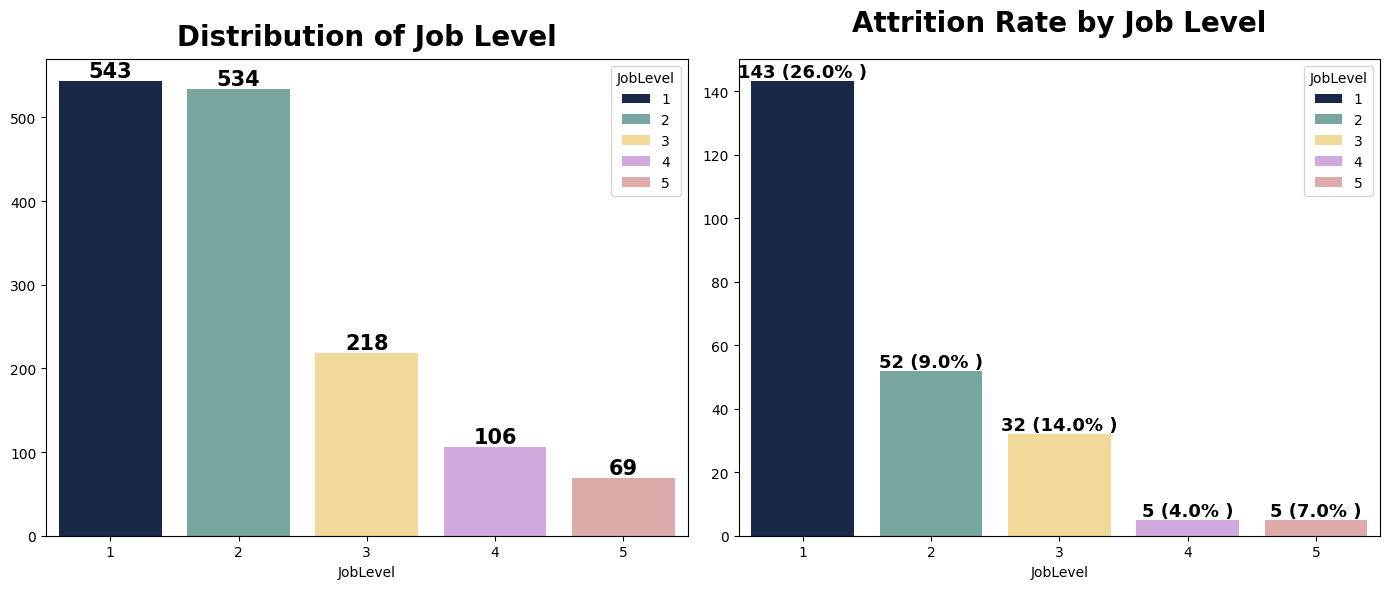

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df['JobLevel'].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, hue=value_1.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title('Distribution of Job Level', fontweight='black', size=20, pad=10)
for index, value in enumerate(value_1.values):
  plt.text(index, value, value, ha='center', va='bottom', fontweight='black', size=15)

#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,hue=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=13,fontweight="black")
plt.tight_layout()
plt.show()

Most of the employees in the organization are at Entry Level or Junior Level.

Highest Attrition is at the Entry Level.

As the level increases the attrition rate decreases.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY JOB SATISFACTION

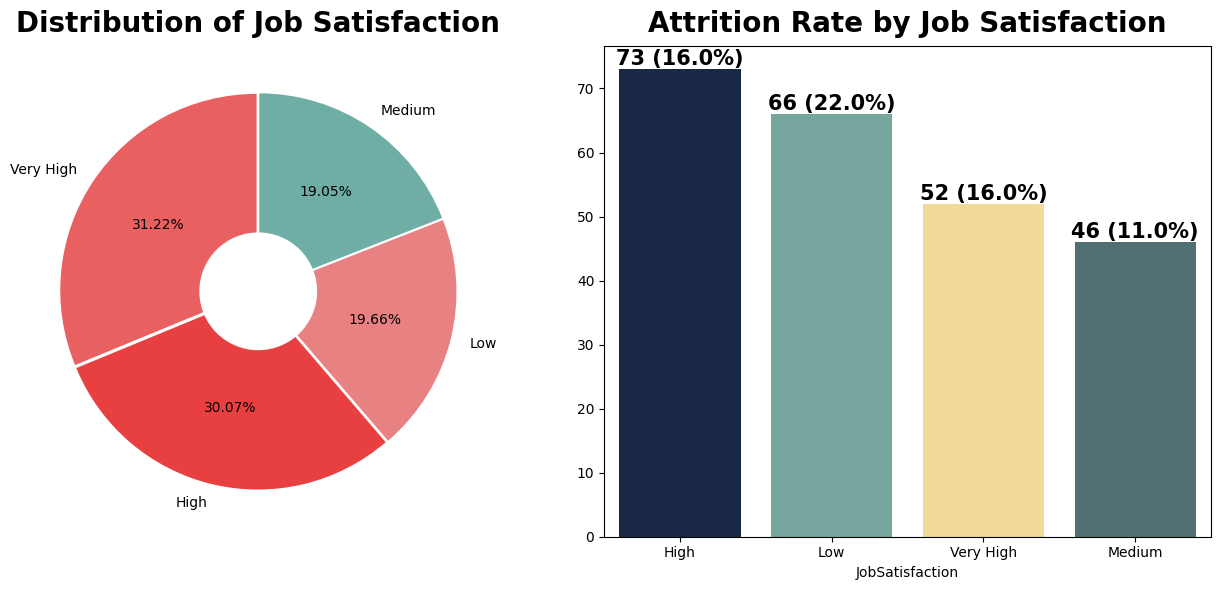

In [43]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df['JobSatisfaction'].value_counts()
plt.title('Distribution of Job Satisfaction', fontweight='black', size=20, pad=10)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', startangle=90, explode=[0.01,0.01,0.01,0.01], colors=['#E96060','#E84040','#E88181','#6faea4'])
center_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['JobSatisfaction'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue= value_2.index, palette=["#11264e","#6faea4","#FEE08B","#4b7478"])
plt.title('Attrition Rate by Job Satisfaction', fontweight='black', size=20, pad=10)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', size=15, fontweight='black')
plt.tight_layout()
plt.show()

1.Most of the employees have rated their job satisfaction as high or very high.

2.Employees who rated their job satisfaction low are mostly leaving the organization.

3.All the categories in job satisfaction is having high attrition rate.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY MARITAL STATUS

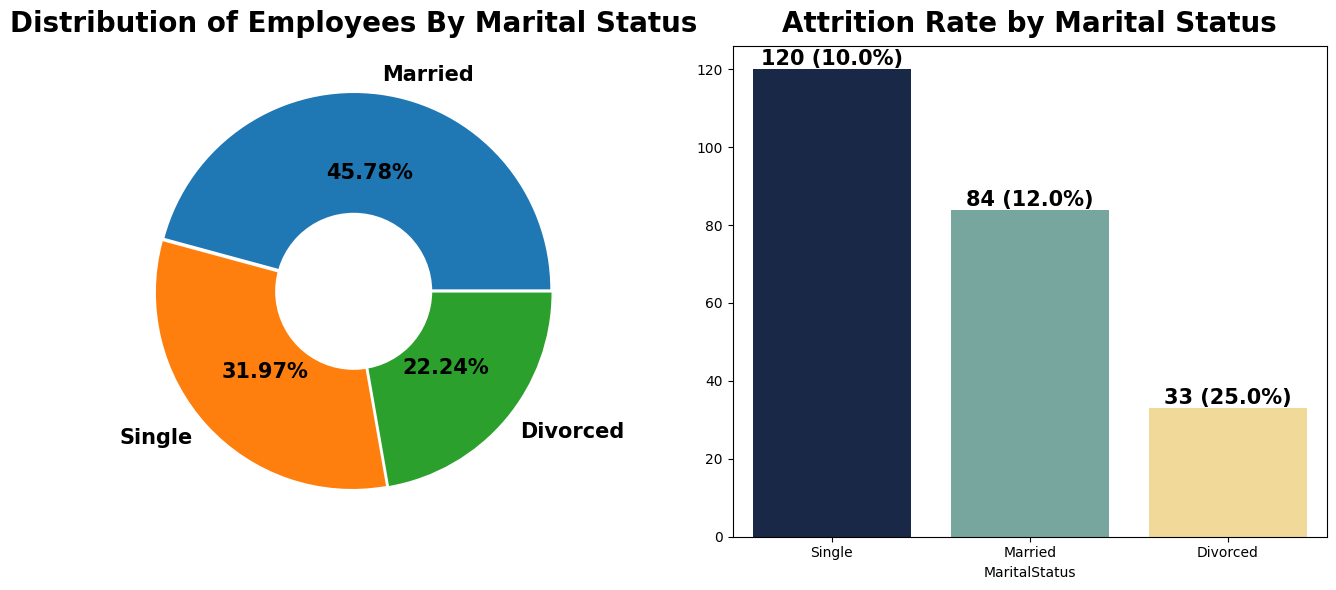

In [44]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df['MaritalStatus'].value_counts()
plt.title("Distribution of Employees By Marital Status", fontweight='black', size=20, pad=10)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', textprops={'fontweight':'black','size':15}, explode=[0.01,0.01,0.01])
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['MaritalStatus'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Marital Status", fontweight='black', size=20, pad=10)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(attrition_rate[index])+"%)", ha='center', va='bottom', size=15, fontweight='black')
plt.tight_layout()
plt.show()

1.Most of the employees are Married in the organization.

2.The attrition rate is very high of employees who are divorced.

3.The attrition rate is low for employees who are single.

#### VISUALIZATION OF EMPLOYEE ATTRITION BY MONTHLY INCOME

<ipython-input-45-3f90d6858885>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])


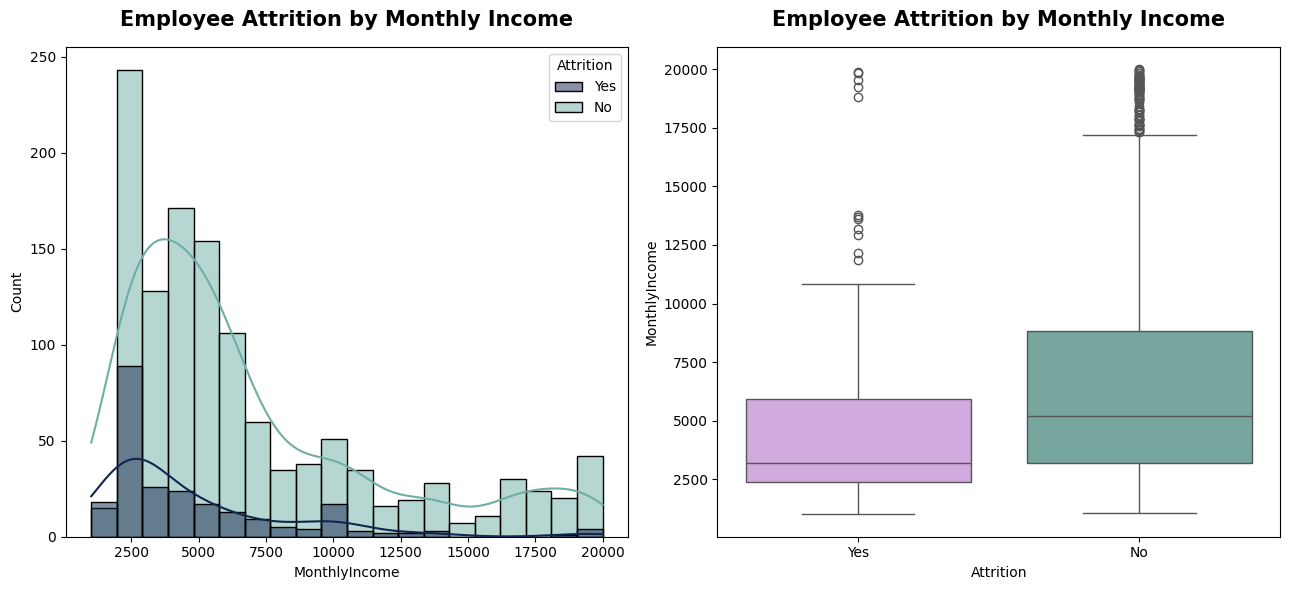

In [45]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=15,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=15,pad=15)
plt.tight_layout()
plt.show()

1.Most of the employees are getting paid less than 10000 in the organiation.

2.The average monthly income of employee who have left is comparatively low with employee who are still working.

3.As the Monthly Income increases the attrition decreases.

#### Visualization of Employee Attrition by Work Experience

In [46]:
df["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [47]:
bin_edges = [0,1,3,5,10]

bin_labels= ['0-1 companies','2-3 companies', '4-5 companies', '5+ companies']

df['NumCompaniesWorkedGroup'] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

<ipython-input-48-69db2144561a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
<ipython-input-48-69db2144561a>:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


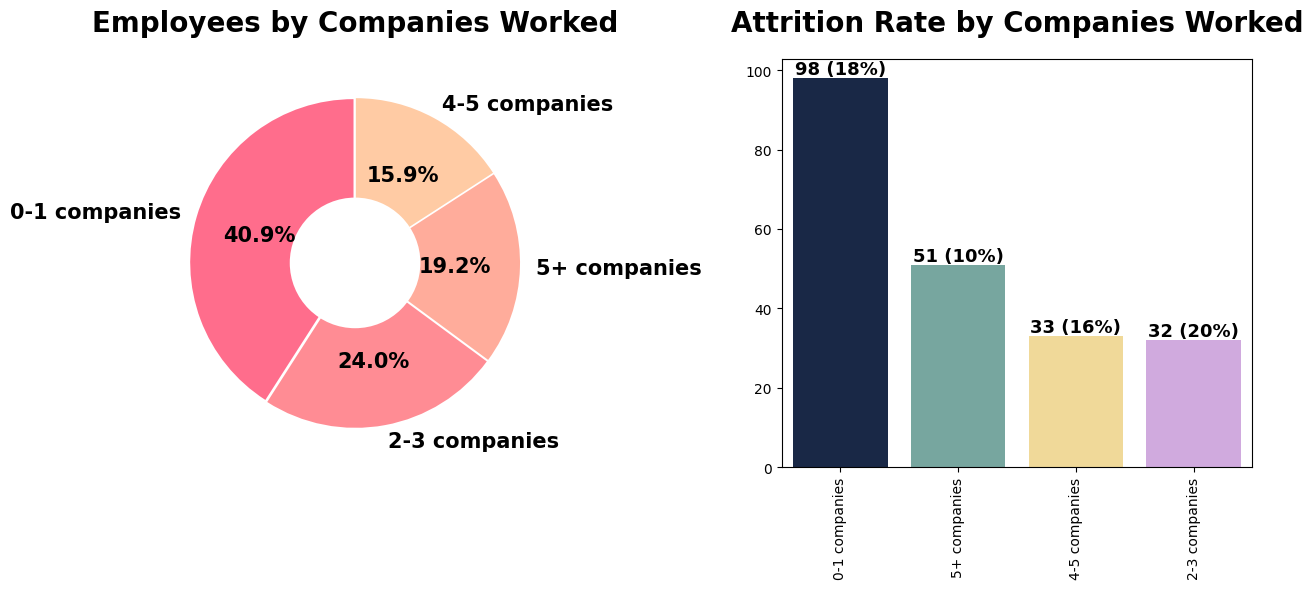

In [48]:
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",explode=[0.01,0.01,0.01,0.01],startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=13,fontweight="black")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1.Most of the employees have worked for less than 2 companies.

2.There's a high attrition rate of employees who haved for less than 5 companies.

#### Visualize Employee attrition by Overtime

<ipython-input-49-b6c2b851c83c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])


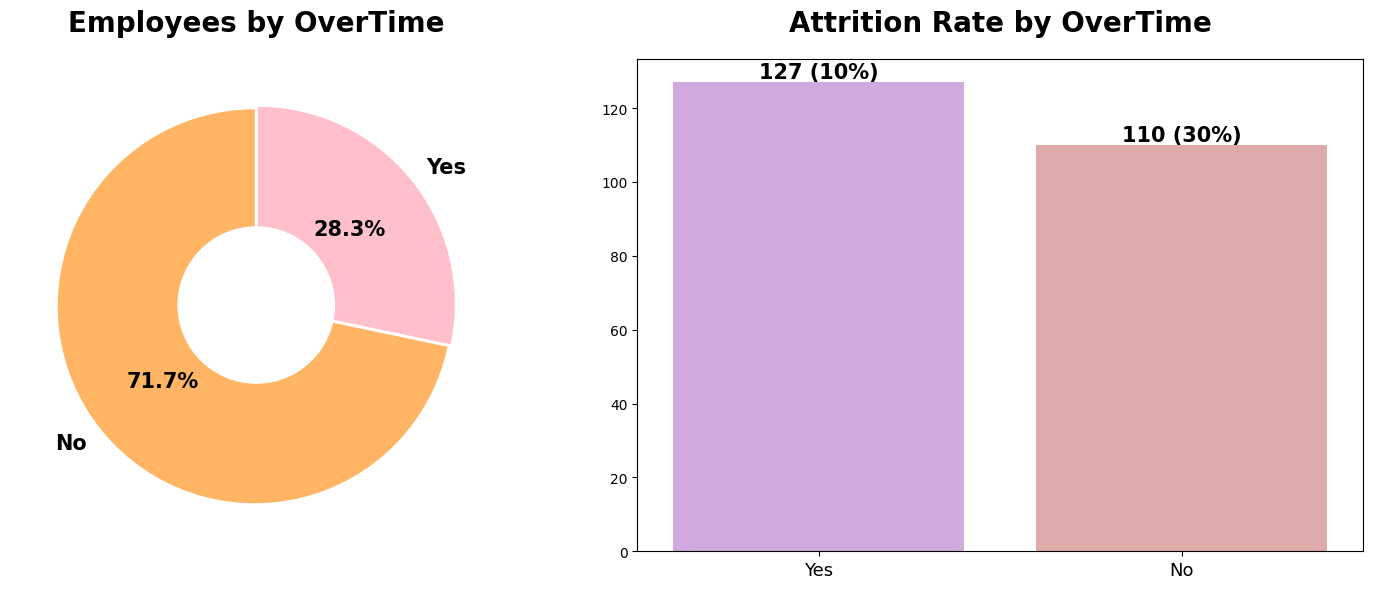

In [49]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", explode=[0.01,0.01],startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

1.Most of the employees doesn't work for OverTime.

2.The feature OverTime is having a very high class imbalance due to which we can't make any meaningful insights.

#### Visualize employee attrition by Salary Hike

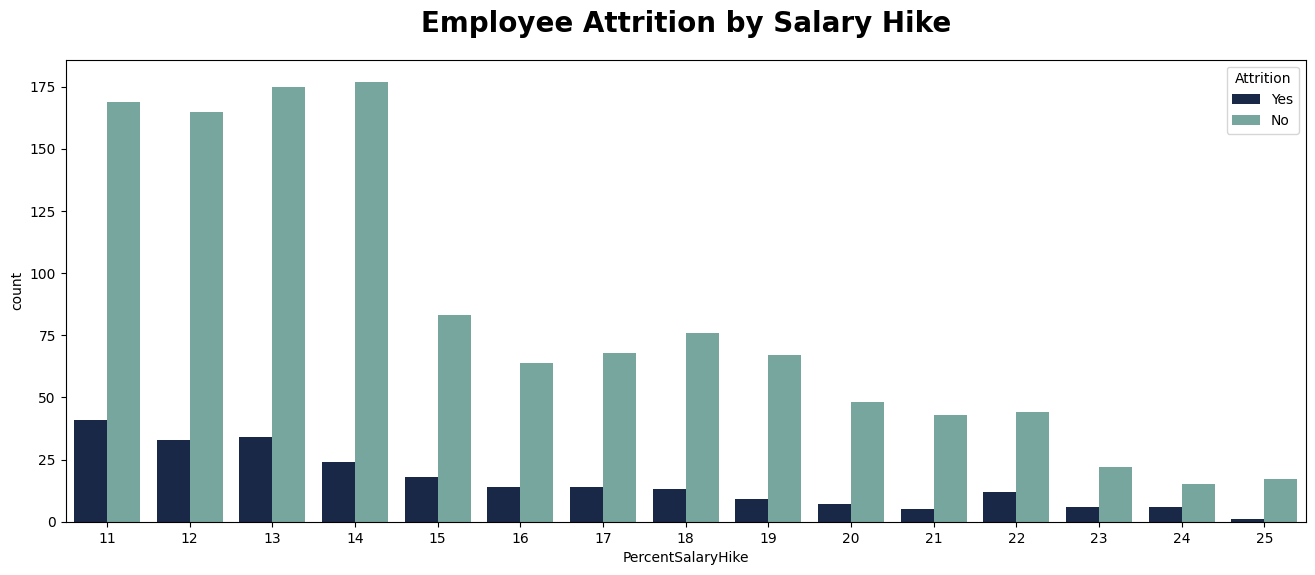

In [50]:
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike",hue="Attrition",data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Salary Hike",fontweight="black",size=20,pad=20)
plt.show()

1.Very Few employees are getting a high percent salary hike.

2.As the amount of percent salary increases the attrition rate decreases.

#### Visualize the Employee Attrition by Performance Rating

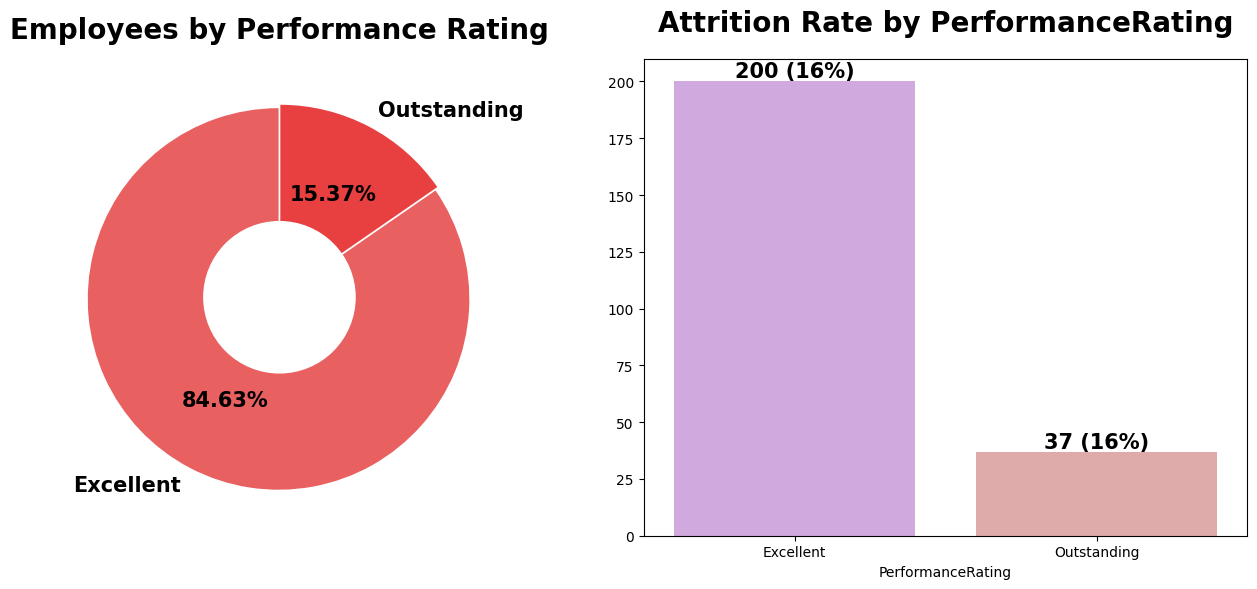

In [51]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df['PerformanceRating'].value_counts()
plt.title('Employees by Performance Rating', fontweight='black', size=20, pad=15)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', explode=[0.01,0.01], startangle=90, colors=['#E96060','#E84040','#6faea4'], textprops={'fontweight':'black', 'size':'15'})
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['PerformanceRating'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating", fontweight='black', size=20, pad=20)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha='center', va='bottom', size=15, fontweight='black')
plt.tight_layout()
plt.show()

1.Most of the employees are having excellent performance rating.

2.Both the categories in this field is having same attriton rate.

3.That's why we can't generate any meaningful inisghts

#### Visualizing Employee Attrition by Relationship Satisfaction

<ipython-input-52-3d1d68da2539>:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


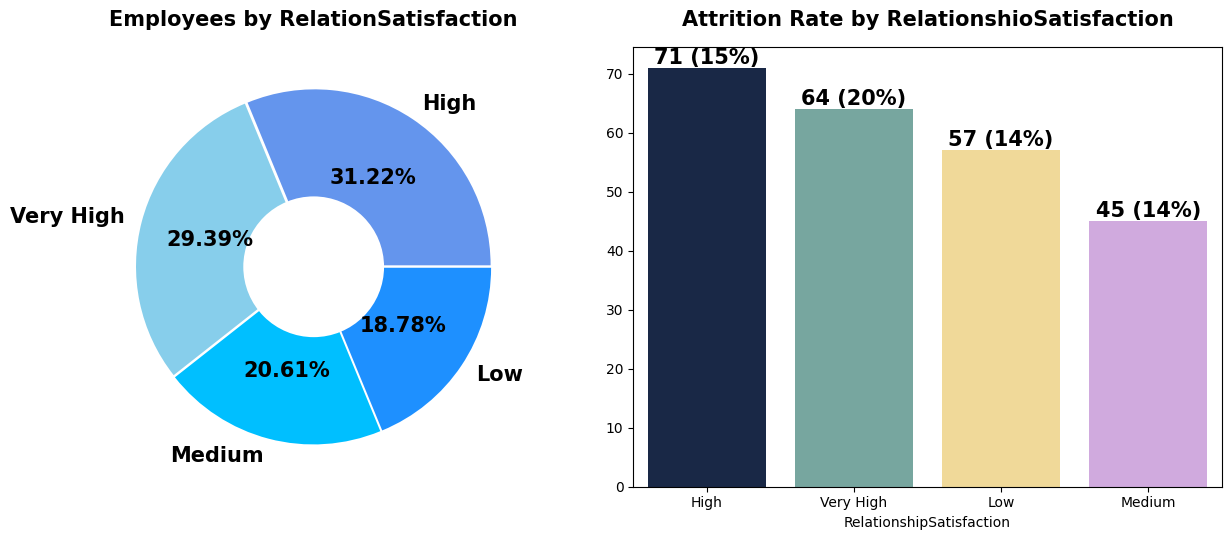

In [52]:
plt.figure(figsize=(13,5.5))
plt.subplot(1,2,1)
value_1 = df['RelationshipSatisfaction'].value_counts()
plt.title('Employees by RelationSatisfaction', fontweight='black', size=15, pad=15)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', textprops={'fontweight':'black','size':'15'}, explode=[0.01,0.01,0.01,0.01], colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'])
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['RelationshipSatisfaction'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title('Attrition Rate by RelationshioSatisfaction', fontweight='black', size=15, pad=15)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha='center', va='bottom', size=15, fontweight='black')
plt.tight_layout()
plt.show()

1.Most of the employees are having high or very high relationship satisfaction.

2.Though the relationship satification is high there's a high attrition rate.

3.All the categories in this feature is having a high attriton rate.

#### Visualize Employee Attrition by Work Life Balance

In [53]:
df['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

<ipython-input-54-6aadfd957fa0>:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


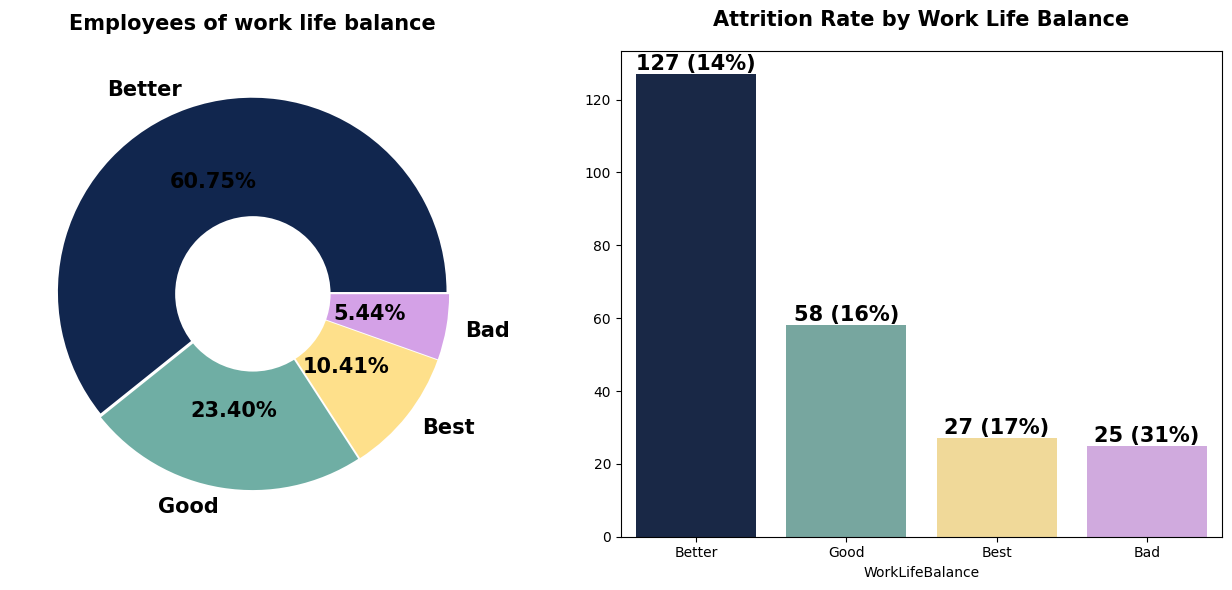

In [54]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title('Employees of work life balance', fontweight='black', size=15, pad=15)
plt.pie(value_1.values, labels=value_1.index, autopct="%.2f%%", textprops={'fontweight':'black','size':15}, explode=[0.01,0.01,0.01,0.01], colors=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df["Attrition"]=='Yes']
value_2 = new_df['WorkLifeBalance'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Work Life Balance",fontweight="black",size=15,pad=18)
for index, value in enumerate(value_2.values):
  plt.text(index, value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha='center', va='bottom', fontweight='black', size=15)
plt.tight_layout()
plt.show()

#### Visualize Employee Attrition by Total Working Experience

In [55]:
bins_edges = [0,5,10,20,50]

bin_labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

df['TotalWorkingYearsGroup'] = pd.cut(df['TotalWorkingYears'], bins=bins_edges, labels=bin_labels)

<ipython-input-56-e0db7202b3fa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])


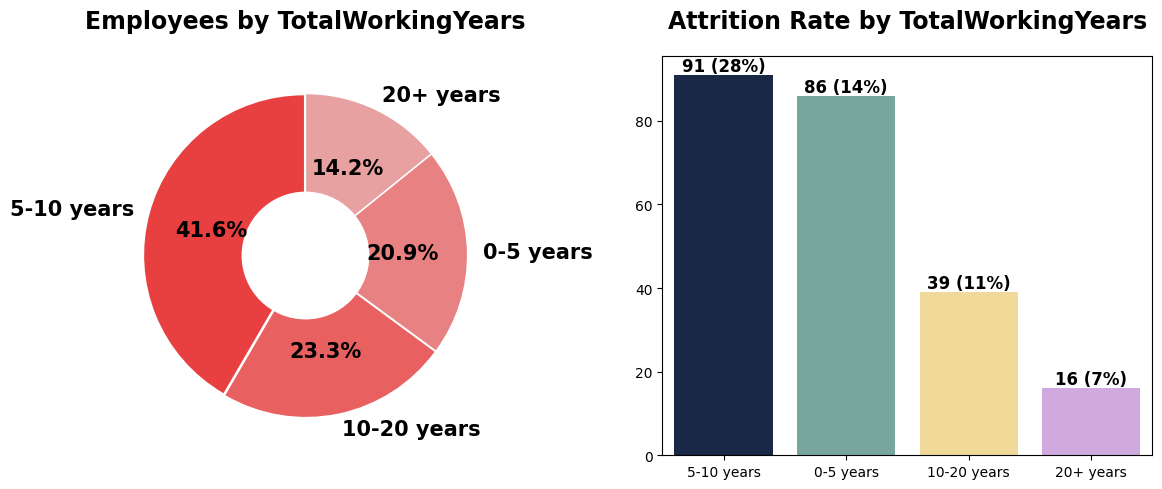

In [56]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
value_1 = df["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=17, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", explode=[0.01,0.01,0.01,0.01],startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=17,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=12,fontweight="black")
plt.tight_layout()
plt.show()

1.Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate is also **very high.

2.Employee with working experience of less than 10 years are having High Attrition Rate.

3.Employee with working experience of more than 10 years are having Less Attrition Rate

In [57]:
df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23])

In [58]:
bin_edges = [0,1,5,10,20]

bin_labels = ['0-1 years','2-5 years', '5-10 years', '10+ years']

df['YearsAtCompanyGroup']=pd.cut(df['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

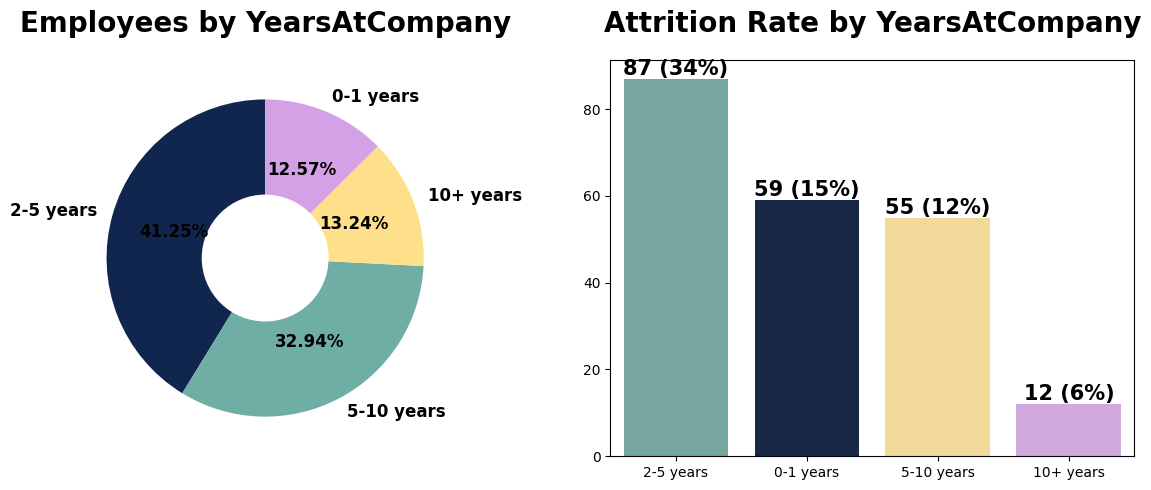

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
value_1 = df['YearsAtCompanyGroup'].value_counts()
plt.title('Employees by YearsAtCompany', fontweight='black', size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', textprops={'fontweight':'black','size':'12'}, colors=["#11264e","#6faea4","#FEE08B","#D4A1E7"], startangle=90)
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['YearsAtCompanyGroup'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title('Attrition Rate by YearsAtCompany', fontweight='black', size=20, pad=20)
for index, value in enumerate(value_2):
  plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha='center',va='bottom',size=15,fontweight='black')
plt.tight_layout()
plt.show()

1.Most employees has worked for 2 to 10 years in the organization.

2.Very few employees has working for less than 1 year or more than 10 years.

3.Employee who have worked for 2-5 years are having very high attrition rate.

4.Employee who have worked for 10+ years are having low attrition rate.

#### Visualize Employee Attrition by Years In Current Role

In [60]:
bin_edges = [0,1,5,10,20]

bin_labels = ['0-1 years','2-5 years', '5-10 years', '10+ years']

df['YearsInCurrentRoleGroup']=pd.cut(df['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

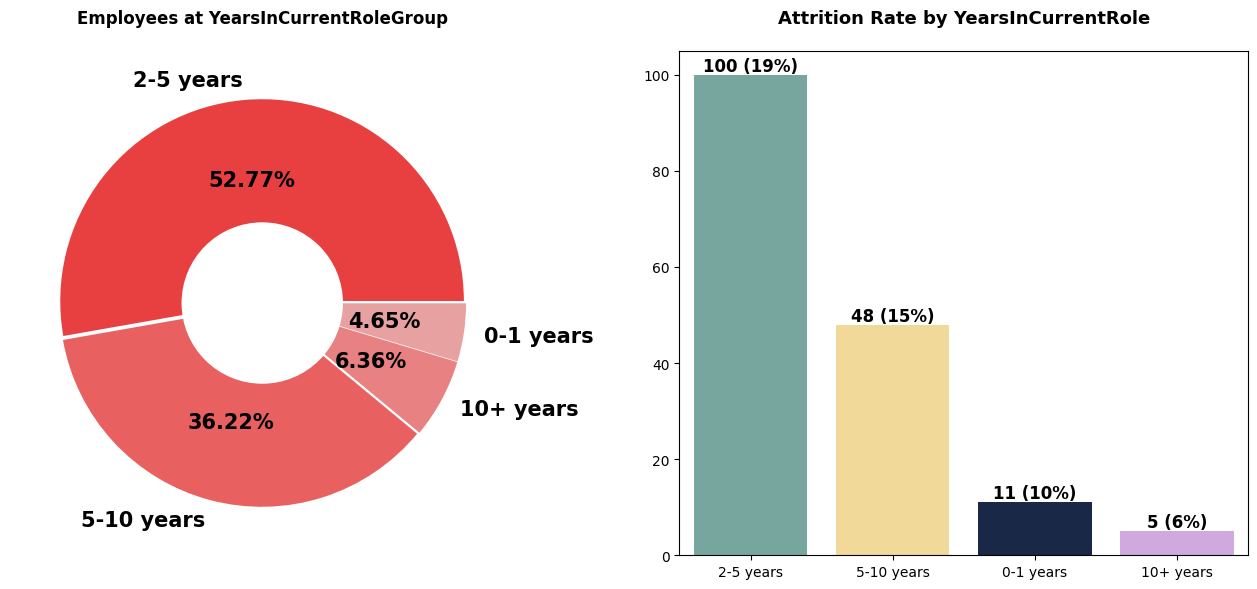

In [61]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df['YearsInCurrentRoleGroup'].value_counts()
plt.title('Employees at YearsInCurrentRoleGroup', fontweight='black', size=12, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct='%.2f%%', textprops={'fontweight':'black','size':'15'}, explode=[0.01,0.01,0.01,0.01], colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'])
center_circle = plt.Circle((0,0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['Attrition']=='Yes']
value_2 = new_df['YearsInCurrentRoleGroup'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, hue= value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title('Attrition Rate by YearsInCurrentRole', fontweight='black', size=13, pad=20)
for index, value in enumerate(value_2):
  plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha='center', va='bottom', size=12, fontweight='black')
plt.tight_layout()
plt.show()

1.Most employees has worked for 2 to 10 years for the same role in the organization.

2.Very few employees has worked for less than 1 year or more than 10 years in the same role.

3.Employee who has worked for 2 to 0 years in the same role are having very high attrition rate.

4.Employee who has worked for 10+ years in the same role are having low attrition rate.

#### Visaulize Employee Attrition by Years Since Last Promotion

In [62]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

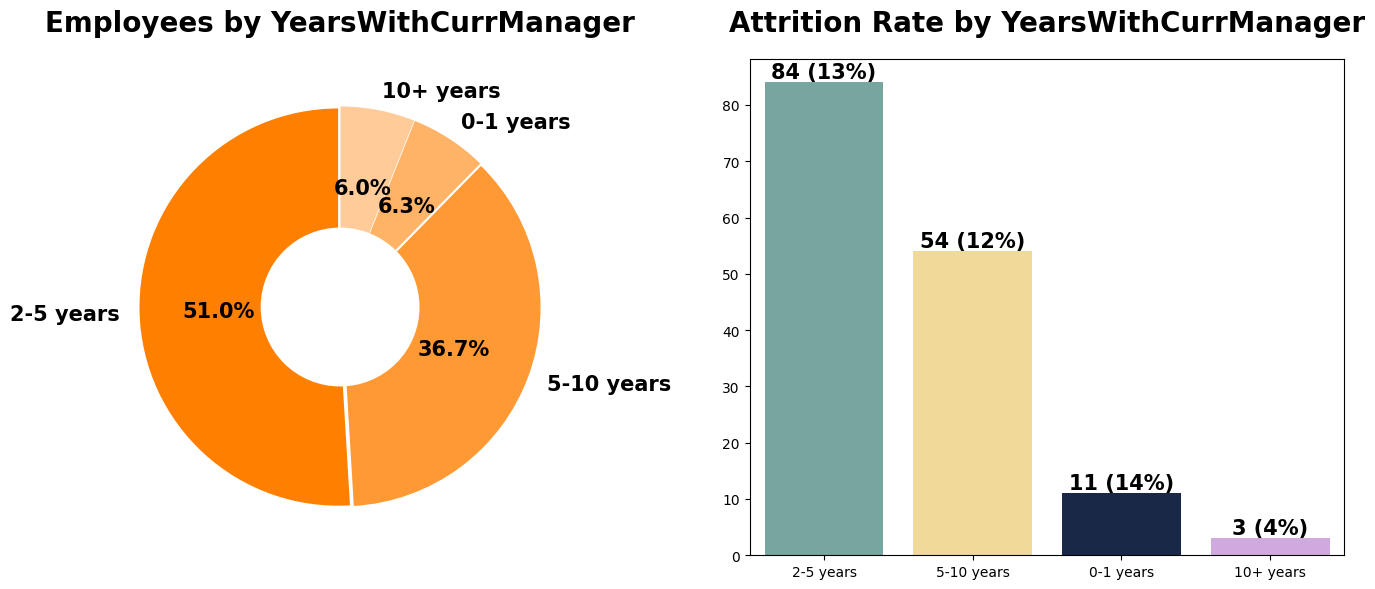

In [63]:
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15},explode=[0.01,0.01,0.01,0.01])
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, hue=value_2.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

#### Visualize Employee Attrition by Years with Current Manager

In [64]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

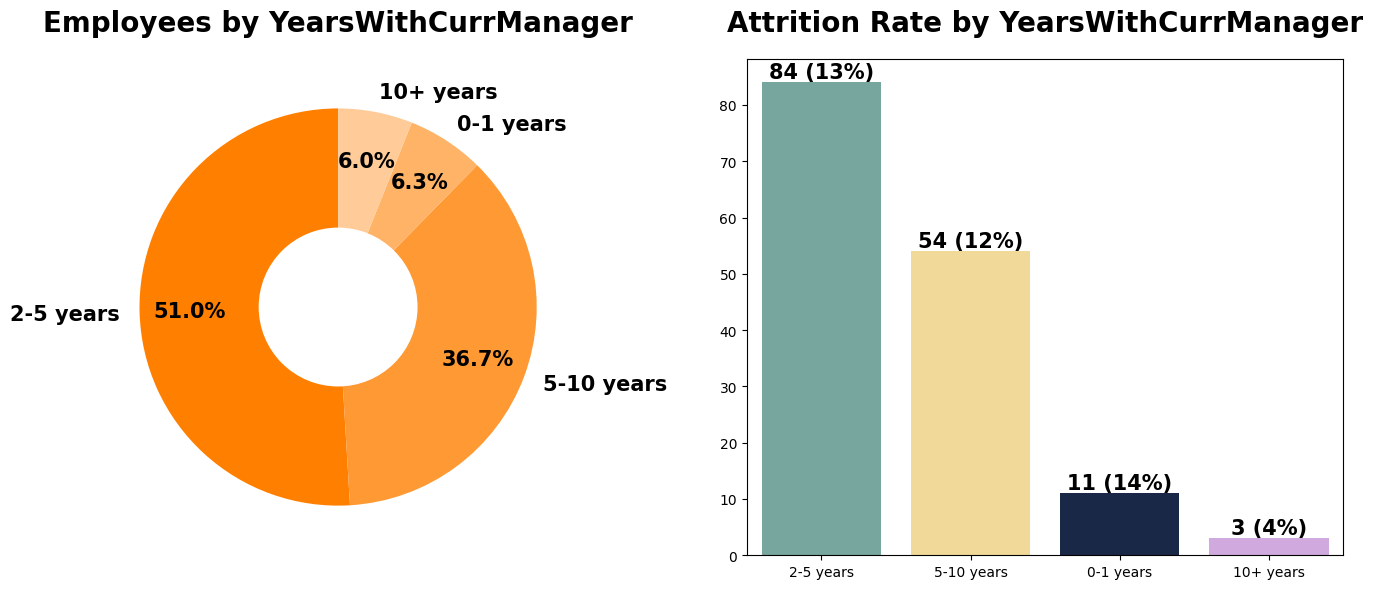

In [65]:
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,hue=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

#**STATISTICAL ANALYSIS**

#### Performing Anova Test

In [66]:
# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [67]:
num_cols = df.select_dtypes(np.number).columns

In [68]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

<ipython-input-68-e83d0028674c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})


In [69]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

#### Visualize the F_score of Anova Test

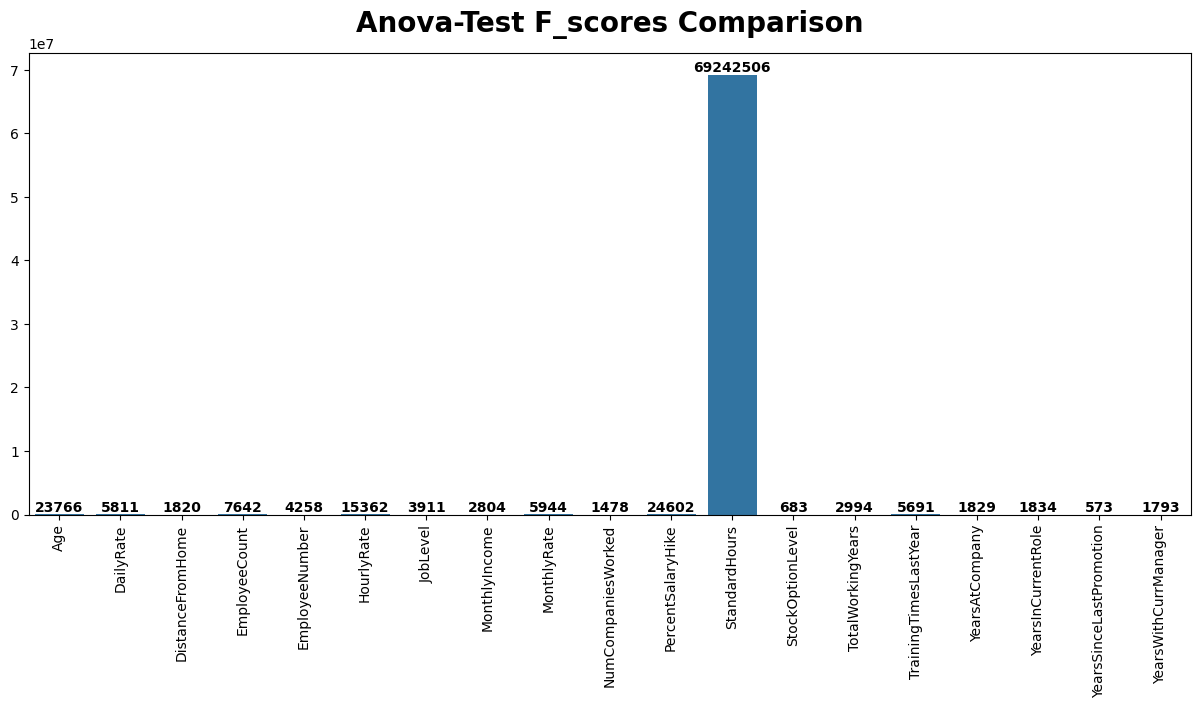

In [70]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=10)
plt.show()

#### Comparing F_score and P_value of Anova Test

In [71]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [72]:
test_df

,Features,F_Score,P_value
0,Age,2.376693e+04,0.00000000000000000000
1,DailyRate,5.811797e+03,0.00000000000000000000
2,DistanceFromHome,1.820615e+03,0.00000000000000000000
3,EmployeeCount,7.642519e+03,0.00000000000000000000
4,EmployeeNumber,4.258788e+03,0.00000000000000000000
5,HourlyRate,1.536212e+04,0.00000000000000000000
6,JobLevel,3.911332e+03,0.00000000000000000000
7,MonthlyIncome,2.804460e+03,0.00000000000000000000
8,MonthlyRate,5.944089e+03,0.00000000000000000000
9,NumCompaniesWorked,1.478189e+03,0.00000000000000000000


The following features shows a strong association with attrition, as indicated by their high F-scores and very low p-values.

Age

DailyRate

HourlyRate

MonthlyIncome

MonthlyRate

NumCompaniesWorked

PercentSalaryHike

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsWithCurrManager

The following features doen't shows significant relationship with attrition because of their moderate F-scores and extremely high p-values.

DistanceFromHome
StockOptionLevel
YearsInCurrentRole
YearsSinceLastPromotion
It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.

#### Perform Chi-Square Test

In [73]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [74]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

#### Visualize the Chi-Square Statistics Value

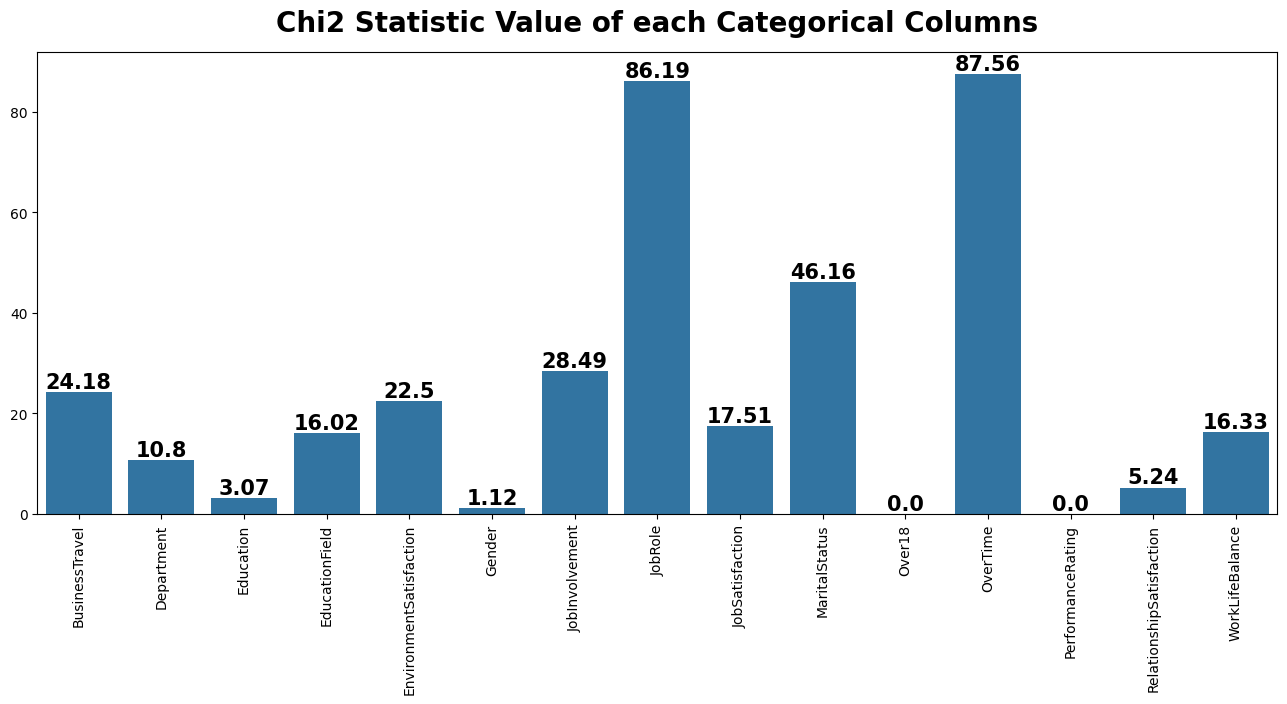

In [75]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

#### Comparing Chi-Square statistics and P_value of Chi-Square Test

In [76]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [77]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobRole,86.190254,0.00000000000000275248
8,JobSatisfaction,17.505077,0.00055630045103875563
9,MaritalStatus,46.163677,0.00000000009455511060


#### Descriptive Analysis on Categorical Attributes

The following features showed statistically significant associations with employee attrition:

Department

EducationField

EnvironmentSatisfaction

JobInvolvement

JobLevel

JobRole

JobSatisfaction

MaritalStatus

OverTime

WorkLifeBalance

The following features did not show statistically
significant associations with attrition.

Gender
Education
PerformanceRating
RelationshipSatisfaction
It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.